# **Predicting GPA grade using SAT score for students currently enrolling in college**

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#reading csv file
#here read_csv method return data frame so we dont need to explicitly mention as dataframe
data = pd.read_csv('/content/GAP Prediction.csv')

In [ ]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
#printing first n rows
data.head(10)

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
5,1670,2.91
6,1764,3.00
7,1764,3.00
8,1792,3.01
9,1850,3.01


In [ ]:
#printing last n rows
data.tail(10)

,SAT,GPA
74,2021,3.61
75,2015,3.62
76,1997,3.64
77,2020,3.65
78,1843,3.71
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76
83,2050,3.81


In [ ]:
#here we can get basic information about datatypes,index,memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [ ]:
#here we can get basic statistics of all numerical columns
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [ ]:
#this function help us to calculate the total no of null values in the dataframe
data.isnull().sum()

,0
SAT,0
GPA,0


array([[<Axes: title={'center': 'SAT'}>, <Axes: title={'center': 'GPA'}>]],
      dtype=object)

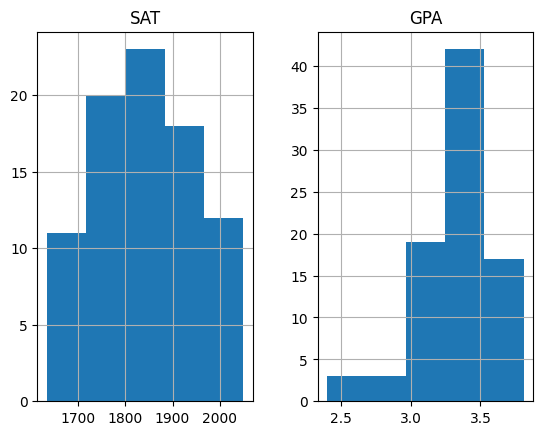

In [ ]:
data.hist(bins=5)

In [ ]:
#here we can see positive corelation which indicates if SAT increases GPA also increases
data.corr()

,SAT,GPA
SAT,1.000000,0.637184
GPA,0.637184,1.000000


In [ ]:
#extracting dependent and independent variables
#here we need to reshape such that we converting into 2D array so that model can efficiently learn
X = data['SAT'].values.reshape(-1,1)
Y = data['GPA'].values.reshape(-1,1)

In [ ]:
print(X.shape)
print(Y.shape)

(84, 1)
(84, 1)


Text(0, 0.5, 'GPA')

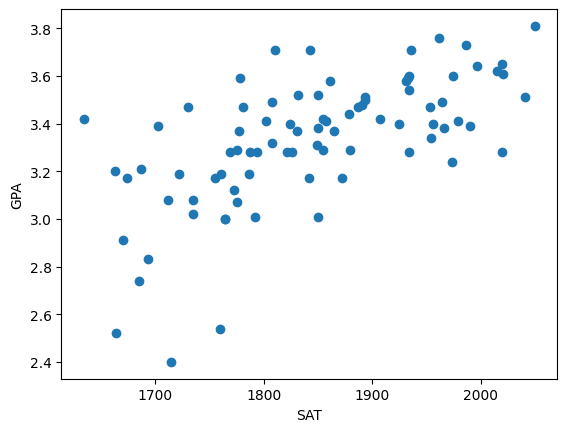

In [ ]:
plt.scatter(X,Y)
plt.xlabel('SAT')
plt.ylabel('GPA')

# **From Scatter plot we can clearly observe that if SAT score increases then the GPA also increases therefore we see clear linear relationship here**

In [ ]:
#This function help us to split the data into two sets so that we train and test separately
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.25,random_state=42)

In [ ]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(63, 1)
(21, 1)
(63, 1)
(21, 1)


In [ ]:
#Here we importing linear regression model
from sklearn.linear_model import LinearRegression

In [ ]:
lr_model = LinearRegression()

In [ ]:
model = lr_model.fit(xtrain,ytrain)

In [ ]:
ypred = model.predict(xtest)

Text(0, 0.5, 'GPA')

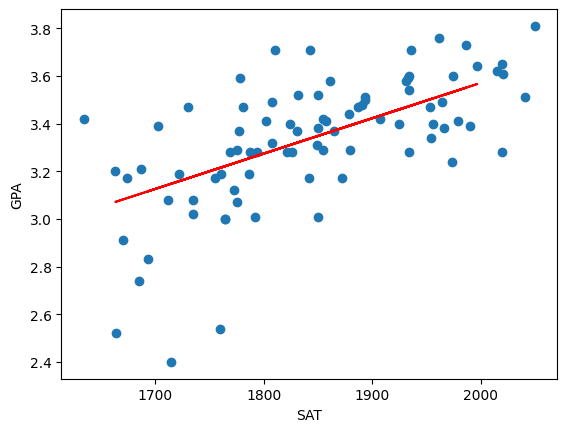

In [ ]:
plt.scatter(X,Y)
plt.plot(xtest,ypred,color='red')
plt.xlabel('SAT')
plt.ylabel('GPA')

In [ ]:
#These are evaluation metrics that helps us to know how well our model get fits with the dataset
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
print("MEA",mean_absolute_error(ytest,ypred))
print("MSE",mean_squared_error(ytest,ypred))
print("R2",r2_score(ytest,ypred))

MEA 0.15548838076312183
MSE 0.04587175782015942
R2 0.4851693872586669


In [ ]:
from math import sqrt as sqrt
print("RMSE",sqrt(mean_squared_error(ytest,ypred)))

RMSE 0.2141769311110779


In [ ]:
model.predict([[5000]])

array([[8.01699134]])

# **Pickle**





In [ ]:
import pickle

In [ ]:
#saving the model
#wb --> write binary we converting into bytes to store
with open ("GPA_model.pkl","wb") as p_file:
  pickle.dump(model,p_file)
  #.dump(our model , file_path that we going to save)
  print("model saved")
  p_file.close()


NameError: name 'model' is not defined

In [ ]:
# loading the saved model
with open ("/content/P__ML projects_GPA_Prediction","rb") as p_file:
  loaded_model = pickle.load(p_file)
  print("model loaded")
  p_file.close()

model loaded


In [ ]:
loaded_model.predict([[5000]])


array([[8.01699134]])